Task1_0724. Wine 데이터셋에 대하여 SVM 모델에 3개의 커널을 적용하여 학습 및 평가 결과를 출력하세요.

SVC 커널

- 선형 커널 SVC(kernel='linear',random_state=42): 선형 커널은 간단하고 빠르며, 데이터가 선형적으로 구분될 때 좋은 성능을 보입니다. Wine 데이터셋에서 선형 커널이 적합한지 확인해보면, 일부 클래스 간의 분류가 충분하지 않을 수 있습니다.
- 다항식 커널 SVC(kernel='poly',random_state=42): 다항식 커널은 비선형적으로 분포된 데이터를 더 잘 처리할 수 있습니다. 차수가 증가함에 따라 모델이 더 복잡해지고, 데이터의 패턴을 더 잘 포착할 수 있지만, 과적합의 위험이 있습니다.
- RBF 커널 SVC(kernel='prbf',random_state=42): RBF 커널은 비선형적인 경계를 가진 데이터에서 가장 효과적입니다. Wine 데이터셋의 복잡한 패턴을 잘 포착할 수 있으며, 높은 성능을 기대할 수 있습니다.

실제 평가 결과를 통해 각 커널의 성능을 비교해 보면 다음과 같은 결론을 얻을 수 있습니다:

- Linear Kernel: 데이터가 선형적으로 분리될 수 있는 경우 적합합니다. Wine 데이터셋에서 높은 정확도를 보입니다.
- Polynomial Kernel: 데이터가 다항식 경계를 가질 때 적합합니다. Wine 데이터셋에서는 선형 커널에 비해 다소 낮은 정확도를 보일 수 있습니다.
- RBF Kernel: 데이터가 비선형 경계를 가질 때 적합합니다. Wine 데이터셋에서 매우 높은 정확도를 보입니다.

Wine 데이터셋에서는 Linear Kernel이 가장 적합할 수 있습니다. 이는 데이터가 선형적으로 잘 분리될 수 있기 때문입니다. 그러나 실제로는 각 커널의 성능을 교차 검증을 통해 비교하고, 데이터의 특성에 따라 최적의 커널을 선택합니다.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
for kk in ['linear', 'poly', 'rbf']:

    # Create a SVM Classifier
    svm = SVC(kernel=kk, C=1.0, random_state=42)

    # Train the model using the training sets
    svm.fit(X_train, y_train)

    # Predict the response for the test dataset
    y_pred = svm.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate and print the accuracy
    accuracy= accuracy_score(y_test, y_pred)
    print(f"kernel:{kk} \n Accuracy:{accuracy:.2f}")

kernel:linear 
 Accuracy:0.98
kernel:poly 
 Accuracy:0.76
kernel:rbf 
 Accuracy:0.76


In [ ]:
# 정답
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X_train , X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Linear SVC 성능 평가
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[19  0  0]
 [ 0 20  1]
 [ 0  0 14]]


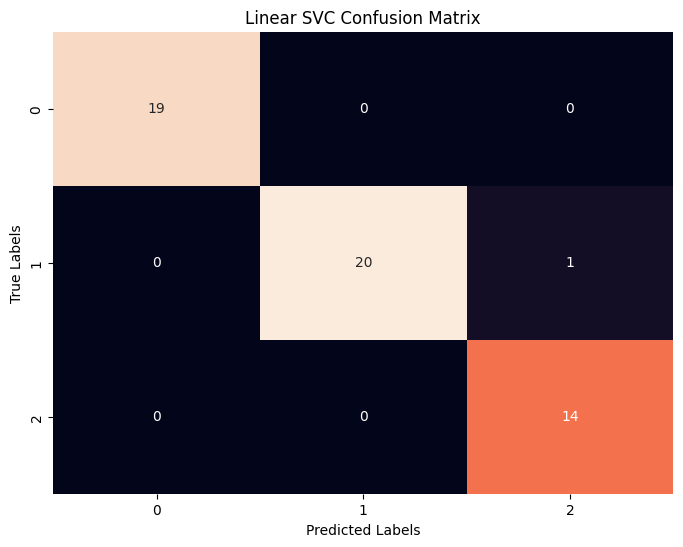

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 선형 커널 SVC 모델 생성 및 학습
linear_svc= SVC(kernel='linear', random_state=42)
linear_svc.fit(X_train, y_train)

# 예측 및 평가
y_pred_linear = linear_svc.predict(X_test)

# 성능평가
print("Linear SVC 성능 평가")
print(classification_report(y_test, y_pred_linear))
print(confusion_matrix(y_test, y_pred_linear))
# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True, fmt='d', cbar=False)
plt.title('Linear SVC Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Task2_0724. breast_cancer dataset으로 랜덤포레스트를 적용하여 모델링 및 평가를 아래의 하이퍼 파라미터를 이용하여 수행한 후 최적의 하이퍼파라미터를 구하세요.

- 'n_estimators': [50, 100, 200],
- 'max_depth': [None, 10, 20],
- 'max_features': ['auto', 'sqrt', 'log2'],
- 'min_samples_split': [2, 5, 10],
- 'min_samples_leaf': [1, 2, 4]

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForeset classifier
clf = RandomForestClassifier(n_estimators=200, min_samples_leaf=1, max_depth=20, random_state=42, min_samples_split=2 ,max_features=3)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98


In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForest classifier with adjusted parameters
clf = RandomForestClassifier(min_samples_leaf=15, max_depth=3, n_estimators=2, random_state=42)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


In [ ]:
import pandas as pd
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

n_estimators: 10
Accuracy: 0.96
Confusion Matrix:
[[ 60   3]
 [  3 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



n_estimators: 50
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



n_estimators: 100
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

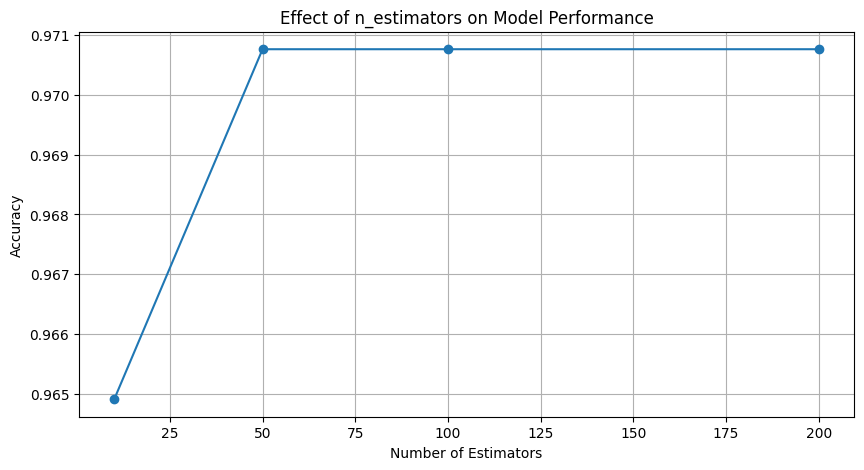

max_depth: 5
Accuracy: 0.96
Confusion Matrix:
[[ 59   4]
 [  2 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



max_depth: 10
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



max_depth: 20
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

         

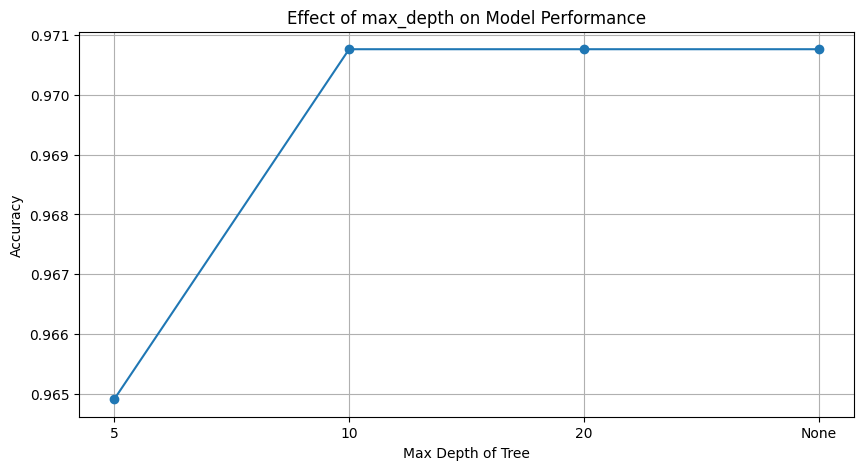

max_features: sqrt
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



max_features: log2
Accuracy: 0.97
Confusion Matrix:
[[ 59   4]
 [  1 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171





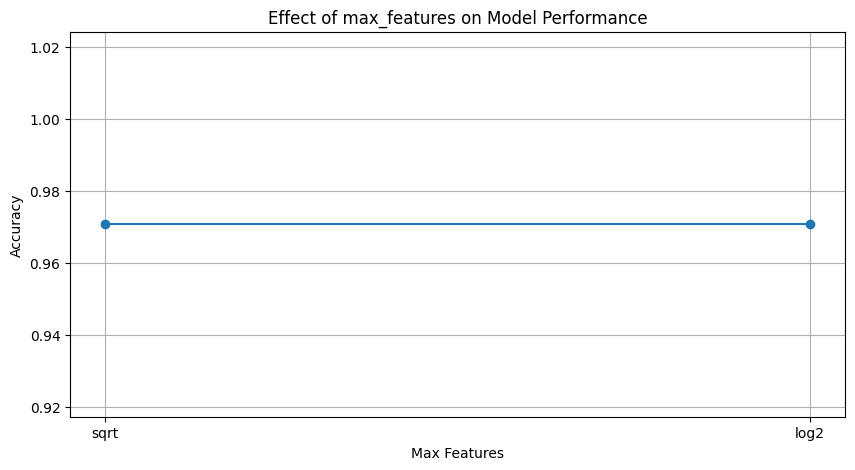

In [ ]:
# 정답
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드 및 분할
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)


# 데이터 로드 및 분할
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

# 1. n_estimators (트리의 개수)
n_estimators_range = [10, 50, 100, 200]
n_estimators_scores = []

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    n_estimators_scores.append(score)
    print(f'n_estimators: {n}')
    print(f'Accuracy: {score:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('\n' + '='*60 + '\n')

# n_estimators 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, n_estimators_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators on Model Performance')
plt.grid(True)
plt.show()

# 2. max_depth (트리의 최대 깊이)
max_depth_range = [5, 10, 20, None]
max_depth_scores = []

for depth in max_depth_range:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    max_depth_scores.append(score)
    print(f'max_depth: {depth}')
    print(f'Accuracy: {score:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('\n' + '='*60 + '\n')

# max_depth 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot([str(d) for d in max_depth_range], max_depth_scores, marker='o')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on Model Performance')
plt.grid(True)
plt.show()

# 3. max_features (각 분할에서 고려할 최대 특성 수)
max_features_range = ['sqrt', 'log2']
max_features_scores = []

for feature in max_features_range:
    rf = RandomForestClassifier(max_features=feature, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    max_features_scores.append(score)
    print(f'max_features: {feature}')
    print(f'Accuracy: {score:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    print('\n' + '='*60 + '\n')

# max_features 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(max_features_range, max_features_scores, marker='o')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Effect of max_features on Model Performance')
plt.grid(True)
plt.show()


Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
오차행렬:
 [[ 59   4]
 [  1 107]]
정확도: 0.97
정밀도: 0.96
재현율: 0.99
F1 스코어: 0.98
ROC AUC: 1.00



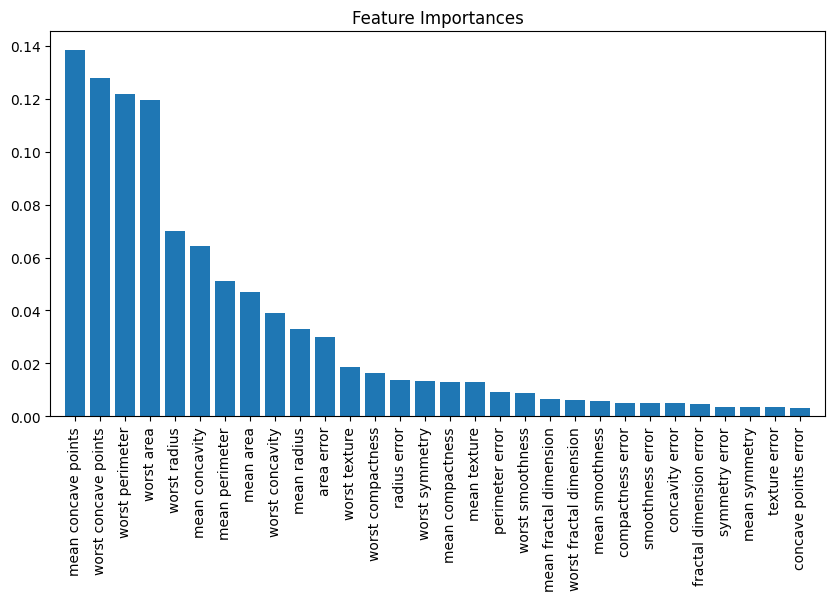

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

def train_and_evalute(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba[:, 1])
    confusion = confusion_matrix(y_test, y_pred)

    print(f'오차행렬:\n {confusion}')
    print(f'정확도: {accuracy:.2f}')
    print(f'정밀도: {precision:.2f}')
    print(f'재현율: {recall:.2f}')
    print(f'F1 스코어: {f1:.2f}')
    print(f'ROC AUC: {roc_auc:.2f}')
    print('')

cancer = load_breast_cancer()
X=cancer.data
y=cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 하이퍼 파라미터 그리드 설정
param_grid= {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5,  verbose=0)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼 파라미터 출력
print(f'Best Parameters: {grid_search.best_params_}')

# 최적의 모델로 평가
best_rf = grid_search.best_estimator_
train_and_evalute(best_rf, X_train, y_train, X_test, y_test)

#중요 변수 시각화
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), cancer.feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## 개조

In [ ]:
# @title 기본 제목 텍스트
# 1. 데이터 로드
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)
data = data.dropna()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

# 회귀 모델 구축
X = data.drop(columns=['income'])
y = data['income']

# 훈련/테스트 데이터 분할
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForest classifier with adjusted parameters
clf = RandomForestClassifier(min_samples_leaf=7, max_depth=10, n_estimators=100, random_state=42)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.81
